# 3 Basic Parameter Estimation Techniques

## 3.1 Discrepancy Function

To maximize the similarity between data and model predictions, the discrepancy function must be minimized. Other names for the discrepancy functions include: objective functions, cost functions, or error functions. 


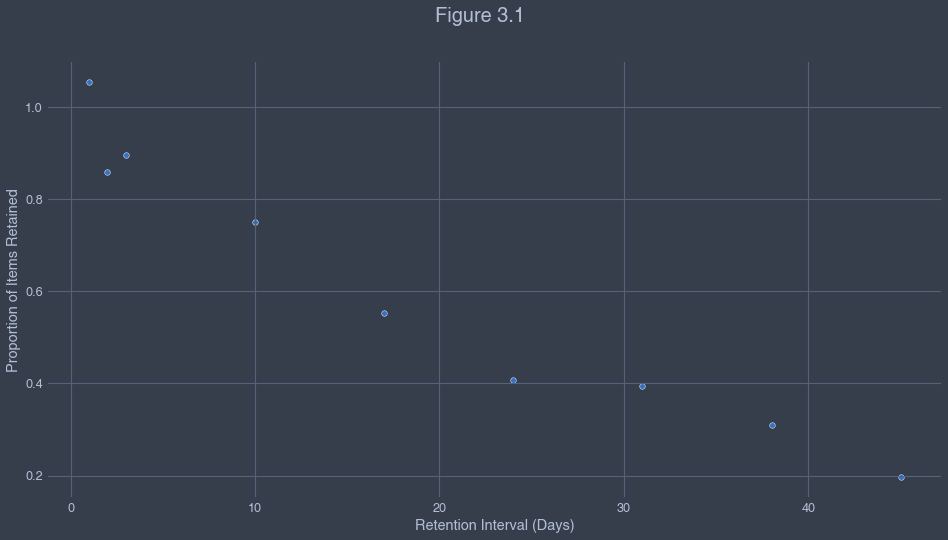

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from jupyterthemes import jtplot
jtplot.style('onedork',
             spines=False,
             figsize=(20, 10)) 

def gen_exp_decay_data(days, scale):
    '''
    Take a vector of days and return simulated data decaying exponentially
    over time with a max of 1 and min of 0. Gaussian noise is added.
    
    Parameters
    ----------
    days : numpy.ndarray
        A vector of days at which hypothetical measurements are taken
    
    scale : float, int
        Arbitrary scaling parameter.
    
    Returns
    -------
    measurements : numpy.ndarray
    '''
    basis = np.exp(-days/scale)
    noise = np.random.normal(loc=0, scale=0.03, size=len(days))
    measurements = basis + noise
    return measurements

days = np.array([1,2,3,10,17,24,31,38,45])
# 30 scale chosen to match figure 3.1 in book
sim_data = gen_exp_decay_data(days, 30) 
sns.scatterplot(x=days, y=sim_data)
plt.ylabel('Proportion of Items Retained')
plt.xlabel('Retention Interval (Days)')
plt.figtext(0.5, 0.95, 'Figure 3.1', wrap=True, horizontalalignment='center', fontsize=20);